In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

sns.set_theme(style="whitegrid")
%matplotlib inline

In [2]:
db_url = os.environ.get("DATABASE_URL")

print(f"🔗 Connecting to DB...")

try:
    engine = create_engine(db_url)
    connection = engine.connect()
    print("✅ Успішне підключення до бази даних PostgreSQL!")
    connection.close()
except Exception as e:
    print(f"❌ Помилка: {e}")
    print("Перевірте, чи запущений контейнер db і чи правильні паролі в .env")

🔗 Connecting to DB...
✅ Успішне підключення до бази даних PostgreSQL!


In [5]:
query = "SELECT * FROM properties"

df = pd.read_sql(query, engine)

df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['created_at'] = pd.to_datetime(df['created_at'])

print(f"📊 Завантажено {len(df)} оголошень.")
df.head()

📊 Завантажено 398 оголошень.


,id,title,price,currency,address,city,district,area,rooms,floor,source_url,source_website,description,images,created_at,updated_at
0,1435,Объявление №2991834 - Продам квартиру 1-ком.,2814500.0,UAH,Объявление №2991834 - Продам квартиру 1-ком.,None,None,32.0,1,None,https://meget.kiev.ua/prodazha-kvartir/details...,meget,Scraped from meget,[],2026-02-07 15:39:11.393106,2026-02-07 15:39:11.393110
1,1436,Объявление №2987143 - Продам квартиру 1-ком.,1385600.0,UAH,Объявление №2987143 - Продам квартиру 1-ком.,None,None,46.0,1,None,https://meget.kiev.ua/prodazha-kvartir/details...,meget,Scraped from meget,[],2026-02-07 15:39:11.443969,2026-02-07 15:39:11.443972
2,1437,Объявление №2985095 - Продам квартиру 3 ком.,2208300.0,UAH,Объявление №2985095 - Продам квартиру 3 ком.,None,None,32.0,3,None,https://meget.kiev.ua/prodazha-kvartir/details...,meget,Scraped from meget,[],2026-02-07 15:39:11.475913,2026-02-07 15:39:11.475916
3,1439,Объявление №2992243 - Продам квартиру 1-ком.,1385600.0,UAH,Объявление №2992243 - Продам квартиру 1-ком.,None,None,130.0,1,None,https://meget.kiev.ua/prodazha-kvartir/details...,meget,Scraped from meget,[],2026-02-07 15:39:11.483336,2026-02-07 15:39:11.483340
4,1441,Объявление №2980804 - Продам квартиру 4-ком.+,4330000.0,UAH,Объявление №2980804 - Продам квартиру 4-ком.+,None,None,46.0,4,None,https://meget.kiev.ua/prodazha-kvartir/details...,meget,Scraped from meget,[],2026-02-07 15:39:11.509918,2026-02-07 15:39:11.509921


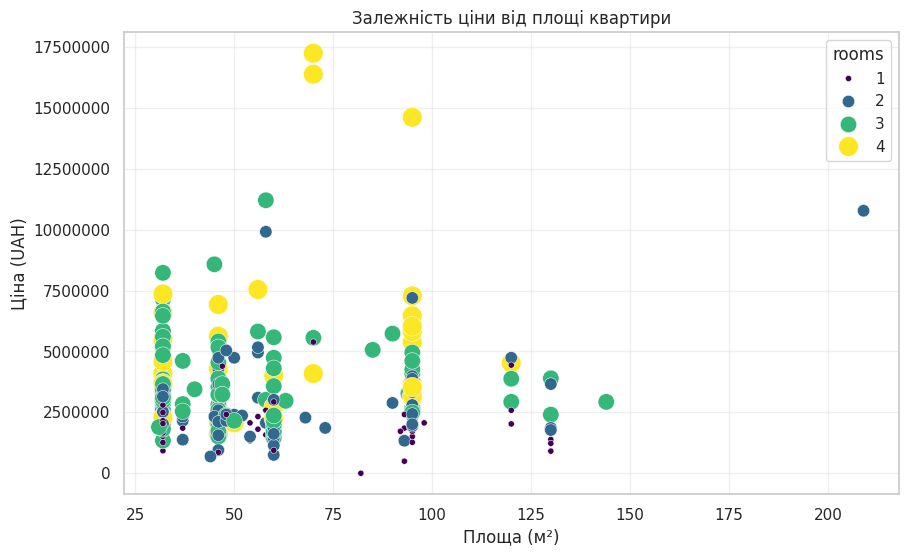

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='area', y='price', hue='rooms', palette='viridis', size='rooms', sizes=(20, 200))

plt.title('Залежність ціни від площі квартири')
plt.xlabel('Площа (м²)')
plt.ylabel('Ціна (UAH)')

plt.ticklabel_format(style='plain', axis='y')
plt.grid(True, alpha=0.3)
plt.show()

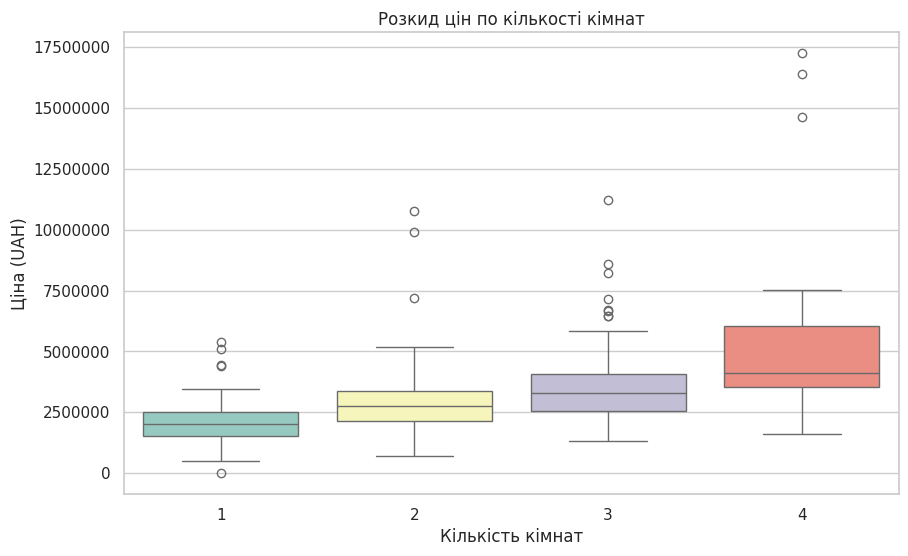

In [9]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=df, x='rooms', y='price', hue='rooms', legend=False, palette="Set3")

plt.title('Розкид цін по кількості кімнат')
plt.xlabel('Кількість кімнат')
plt.ylabel('Ціна (UAH)')
plt.ticklabel_format(style='plain', axis='y')
plt.show()